In [1]:
# !pip install keras
# !pip install tensorflow
# !pip install sklearn

In [2]:
import backtrader as bt
import pandas as pd
import datetime
import pickle
import keras.models
from sklearn.preprocessing import MinMaxScaler

In [4]:
class DailyBuy(bt.Strategy):
    def __init__(self):
        with open("mms.pkl","rb") as f:
            self.mms=pickle.load(f)
        self.model= keras.models.load_model('keras_lstm_model')
        pass
    
    def next(self):
        
        x=self.data.get(0,11)
        x=x[0:10]
        if len(x)>=10:
            x=self.mms.transform([x])
            self.log("BUY: {}".format(x))
            
            x=x.reshape(1,10,1)
            y_pred=self.model.predict(x)
            
            if y_pred[0][0]>0.5:
                y_pred=1
            else:
                y_pred=0
                
            if y_pred==1:
                self.buy(size=20)
            elif y_pred==0 and self.getposition().size>10:
                self.sell(size=10)
        
    def log(self,txt,dt=None):
        dt=self.datas[0].datetime.date(0)
        print('[{}] {}'.format(dt.isoformat(),txt))

In [5]:
?help(bt.Strategy)

Object `help(bt.Strategy)` not found.


In [6]:
import FinanceDataReader as fdr

df=fdr.DataReader('005930',"2019-01-02", "2020-07-31")
# df.index=df.index.strftime('%Y-%m-%d %H:%M:%S')
df.to_csv("005930.csv")

In [7]:
df.head()

Open   High    Low  Close    Volume    Change
Date                                                      
2019-01-02  39400  39400  38550  38750   7847664  0.001292
2019-01-03  38300  38550  37450  37600  12471493 -0.029677
2019-01-04  37450  37600  36850  37450  14108958 -0.003989
2019-01-07  38000  38900  37800  38750  12748997  0.034713
2019-01-08  38000  39200  37950  38100  12756554 -0.016774

In [8]:
import backtrader.feeds as btfeeds

class customCSV(btfeeds.GenericCSVData):
    params=(
        ('dtformat', '%Y-%m-%d'),
        ('datetime', 0),
        ('time', -1),
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('volume', 5),
        ('openinterest', -1),
        )

In [9]:
data=customCSV(dataname="005930.csv")

In [10]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.broker.setcash(300000000)
# cerebro.broker.setcommission(commission=0.00015)
cerebro.addstrategy(DailyBuy)

0

In [11]:
back_init=cerebro.broker.getvalue()

In [12]:
cerebro.run()

[2019-01-16] BUY: [[0.48522854 0.45317726 0.44899666 0.48522854 0.4671126  0.50891862
  0.51449275 0.53400223 0.52146042 0.55072464]]
[2019-01-17] BUY: [[0.45317726 0.44899666 0.48522854 0.4671126  0.50891862 0.51449275
  0.53400223 0.52146042 0.55072464 0.56047938]]
[2019-01-18] BUY: [[0.44899666 0.48522854 0.4671126  0.50891862 0.51449275 0.53400223
  0.52146042 0.55072464 0.56047938 0.57441472]]
[2019-01-21] BUY: [[0.48522854 0.4671126  0.50891862 0.51449275 0.53400223 0.52146042
  0.55072464 0.56047938 0.57441472 0.58416945]]
[2019-01-22] BUY: [[0.4671126  0.50891862 0.51449275 0.53400223 0.52146042 0.55072464
  0.56047938 0.57441472 0.58416945 0.59671126]]
[2019-01-23] BUY: [[0.50891862 0.51449275 0.53400223 0.52146042 0.55072464 0.56047938
  0.57441472 0.58416945 0.59671126 0.57998885]]
[2019-01-24] BUY: [[0.51449275 0.53400223 0.52146042 0.55072464 0.56047938 0.57441472
  0.58416945 0.59671126 0.57998885 0.57580825]]
[2019-01-25] BUY: [[0.53400223 0.52146042 0.55072464 0.5604793

[2019-04-22] BUY: [[0.70540691 0.70540691 0.70680045 0.69425864 0.71098105 0.71655518
  0.72212932 0.71655518 0.6761427  0.66778149]]
[2019-04-23] BUY: [[0.70540691 0.70680045 0.69425864 0.71098105 0.71655518 0.72212932
  0.71655518 0.6761427  0.66778149 0.66917503]]
[2019-04-24] BUY: [[0.70680045 0.69425864 0.71098105 0.71655518 0.72212932 0.71655518
  0.6761427  0.66778149 0.66917503 0.66499443]]
[2019-04-25] BUY: [[0.69425864 0.71098105 0.71655518 0.72212932 0.71655518 0.6761427
  0.66778149 0.66917503 0.66499443 0.65245262]]
[2019-04-26] BUY: [[0.71098105 0.71655518 0.72212932 0.71655518 0.6761427  0.66778149
  0.66917503 0.66499443 0.65245262 0.64966555]]
[2019-04-29] BUY: [[0.71655518 0.72212932 0.71655518 0.6761427  0.66778149 0.66917503
  0.66499443 0.65245262 0.64966555 0.65523969]]
[2019-04-30] BUY: [[0.72212932 0.71655518 0.6761427  0.66778149 0.66917503 0.66499443
  0.65245262 0.64966555 0.65523969 0.69147157]]
[2019-05-02] BUY: [[0.71655518 0.6761427  0.66778149 0.66917503

[2019-07-23] BUY: [[0.66220736 0.67474916 0.69286511 0.69565217 0.69983278 0.71098105
  0.6886845  0.69007804 0.70958751 0.72073579]]
[2019-07-24] BUY: [[0.67474916 0.69286511 0.69565217 0.69983278 0.71098105 0.6886845
  0.69007804 0.70958751 0.72073579 0.72352285]]
[2019-07-25] BUY: [[0.69286511 0.69565217 0.69983278 0.71098105 0.6886845  0.69007804
  0.70958751 0.72073579 0.72352285 0.69843924]]
[2019-07-26] BUY: [[0.69565217 0.69983278 0.71098105 0.6886845  0.69007804 0.70958751
  0.72073579 0.72352285 0.69843924 0.72073579]]
[2019-07-29] BUY: [[0.69983278 0.71098105 0.6886845  0.69007804 0.70958751 0.72073579
  0.72352285 0.69843924 0.72073579 0.71934225]]
[2019-07-30] BUY: [[0.71098105 0.6886845  0.69007804 0.70958751 0.72073579 0.72352285
  0.69843924 0.72073579 0.71934225 0.69007804]]
[2019-07-31] BUY: [[0.6886845  0.69007804 0.70958751 0.72073579 0.72352285 0.69843924
  0.72073579 0.71934225 0.69007804 0.70261984]]
[2019-08-01] BUY: [[0.69007804 0.70958751 0.72073579 0.72352285

[2019-10-25] BUY: [[0.77508361 0.79877369 0.80156076 0.81828317 0.81270903 0.79598662
  0.80713489 0.83221851 0.83221851 0.81828317]]
[2019-10-28] BUY: [[0.79877369 0.80156076 0.81828317 0.81270903 0.79598662 0.80713489
  0.83221851 0.83221851 0.81828317 0.8238573 ]]
[2019-10-29] BUY: [[0.80156076 0.81828317 0.81270903 0.79598662 0.80713489 0.83221851
  0.83221851 0.81828317 0.8238573  0.83500557]]
[2019-10-30] BUY: [[0.81828317 0.81270903 0.79598662 0.80713489 0.83221851 0.83221851
  0.81828317 0.8238573  0.83500557 0.82943144]]
[2019-10-31] BUY: [[0.81270903 0.79598662 0.80713489 0.83221851 0.83221851 0.81828317
  0.8238573  0.83500557 0.82943144 0.80992196]]
[2019-11-01] BUY: [[0.79598662 0.80713489 0.83221851 0.83221851 0.81828317 0.8238573
  0.83500557 0.82943144 0.80992196 0.80992196]]
[2019-11-04] BUY: [[0.80713489 0.83221851 0.83221851 0.81828317 0.8238573  0.83500557
  0.82943144 0.80992196 0.80992196 0.83221851]]
[2019-11-05] BUY: [[0.83221851 0.83221851 0.81828317 0.8238573 

[2020-01-28] BUY: [[1.06354515 1.07748049 1.07748049 1.04960981 1.09698997 1.11371237
  1.14437012 1.11649944 1.14158305 1.09977703]]
[2020-01-29] BUY: [[1.07748049 1.07748049 1.04960981 1.09698997 1.11371237 1.14437012
  1.11649944 1.14158305 1.09977703 1.04403567]]
[2020-01-30] BUY: [[1.07748049 1.04960981 1.09698997 1.11371237 1.14437012 1.11649944
  1.14158305 1.09977703 1.04403567 1.05239688]]
[2020-01-31] BUY: [[1.04960981 1.09698997 1.11371237 1.14437012 1.11649944 1.14158305
  1.09977703 1.04403567 1.05239688 0.99944259]]
[2020-02-03] BUY: [[1.09698997 1.11371237 1.14437012 1.11649944 1.14158305 1.09977703
  1.04403567 1.05239688 0.99944259 0.97714604]]
[2020-02-04] BUY: [[1.11371237 1.14437012 1.11649944 1.14158305 1.09977703 1.04403567
  1.05239688 0.99944259 0.97714604 0.99944259]]
[2020-02-05] BUY: [[1.14437012 1.11649944 1.14158305 1.09977703 1.04403567 1.05239688
  0.99944259 0.97714604 0.99944259 1.04682274]]
[2020-02-06] BUY: [[1.11649944 1.14158305 1.09977703 1.0440356

[2020-04-24] BUY: [[0.77369008 0.77787068 0.75139353 0.77090301 0.77090301 0.83779264
  0.80156076 0.77787068 0.79459309 0.79459309]]
[2020-04-27] BUY: [[0.77787068 0.75139353 0.77090301 0.77090301 0.83779264 0.80156076
  0.77787068 0.79459309 0.79459309 0.78065775]]
[2020-04-28] BUY: [[0.75139353 0.77090301 0.77090301 0.83779264 0.80156076 0.77787068
  0.79459309 0.79459309 0.78065775 0.79459309]]
[2020-04-29] BUY: [[0.77090301 0.77090301 0.83779264 0.80156076 0.77787068 0.79459309
  0.79459309 0.78065775 0.79459309 0.80156076]]
[2020-05-04] BUY: [[0.77090301 0.83779264 0.80156076 0.77787068 0.79459309 0.79459309
  0.78065775 0.79459309 0.80156076 0.79877369]]
[2020-05-06] BUY: [[0.83779264 0.80156076 0.77787068 0.79459309 0.79459309 0.78065775
  0.79459309 0.80156076 0.79877369 0.75696767]]
[2020-05-07] BUY: [[0.80156076 0.77787068 0.79459309 0.79459309 0.78065775 0.79459309
  0.80156076 0.79877369 0.75696767 0.77647715]]
[2020-05-08] BUY: [[0.77787068 0.79459309 0.79459309 0.7806577

[2020-07-27] BUY: [[0.893534   0.90468227 0.92976589 0.90468227 0.92140468 0.91583055
  0.94648829 0.92976589 0.91304348 0.91583055]]
[2020-07-28] BUY: [[0.90468227 0.92976589 0.90468227 0.92140468 0.91583055 0.94648829
  0.92976589 0.91304348 0.91583055 0.9548495 ]]
[2020-07-29] BUY: [[0.92976589 0.90468227 0.92140468 0.91583055 0.94648829 0.92976589
  0.91304348 0.91583055 0.9548495  1.03846154]]
[2020-07-30] BUY: [[0.90468227 0.92140468 0.91583055 0.94648829 0.92976589 0.91304348
  0.91583055 0.9548495  1.03846154 1.04960981]]
[2020-07-31] BUY: [[0.92140468 0.91583055 0.94648829 0.92976589 0.91304348 0.91583055
  0.9548495  1.03846154 1.04960981 1.04960981]]


In [13]:
result=cerebro.broker.getvalue()

In [14]:
print("{:.2f}%".format(result/back_init*100-100))

21.00%


<IPython.core.display.Javascript object>


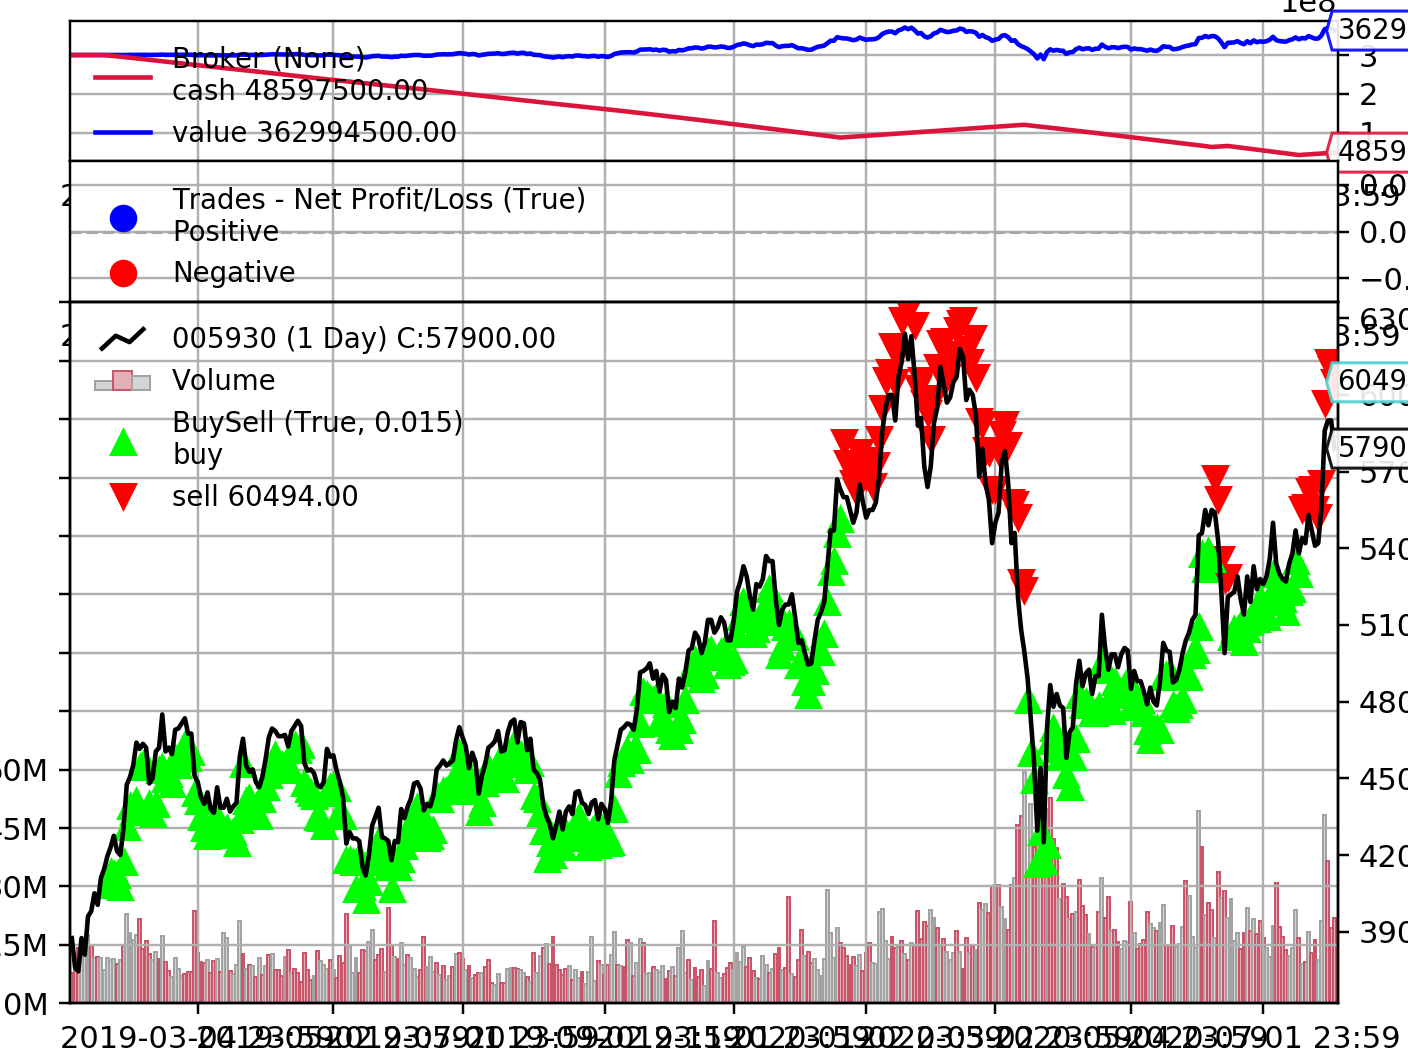

[[<Figure size 640x480 with 4 Axes>]]

In [15]:
cerebro.plot()